In [1]:
import datatable as dt
import pandas as pd
import seaborn as sns
import os
import shutil
from time import time
from datatable import f
%matplotlib inline

In [2]:
df_time = dt.Frame([[]] * 4, names=["library", "file", "size", "time"])

def append_row(df, row):
    df.rbind(dt.Frame([[j] for j in row]), bynames=False)

In [3]:
def measure(task, file):
    df = dt.fread(file)
    pf = df.topandas()
    for lib in ['datatable', 'pandas']:
        try:
            outfile = "%s_%s" % (task, lib)
            t0 = time()
            if lib == "datatable":
                df.save(outfile)
            else:
                pf.to_feather(outfile)
            t1 = time()
            size = os.stat(outfile).st_size
            append_row(df_time, [lib, task, size, t1 - t0])
            print("[%-10s] %s = %f" % (lib, task, t1 - t0))
            # if lib == "datatable":
            #     shutil.rmtree(outfile)
            # else:
            #     os.unlink(outfile)
        except Exception as e:
            print("[%-10s] %s = Error: %s" % (lib, task, e))
            append_row(df_time, [lib, task, size, 0])

In [4]:
measure("airlines", "~/datasets/airlines_all.05p.csv")
measure("higgs2M", "~/datasets/higgs_head_2M.csv")
measure("donors", "~/datasets/donors-choose/train_resources.csv")
measure("allstate", "~/datasets/allstate-bodilyclaims-kaggle/train_set_NA.csv")
measure("milsongs", "~/datasets/milsongs/milsongs-cls-train.csv.gz")

[datatable ] airlines = 2.110587
[pandas    ] airlines = 5.700282
[datatable ] higgs2M = 0.741756
[pandas    ] higgs2M = 0.814456
[datatable ] donors = 0.628700
[pandas    ] donors = 1.725094
[datatable ] allstate = 7.362164
[pandas    ] allstate = 20.275278
[datatable ] milsongs = 0.906421
[pandas    ] milsongs = 0.877954


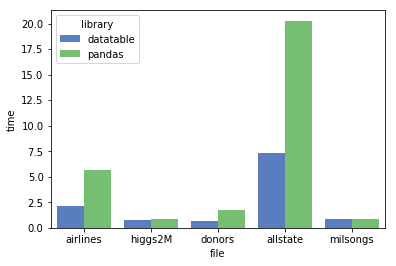

In [5]:
ax = sns.barplot(x="file", y="time", hue="library", palette="muted", data=df_time.topandas())

In [6]:
f0 = df_time[f.library=="datatable", {"file": f.file, "dt": f.time}]
f1 = df_time[f.library=="pandas", {"pd": f.time}]
f0.cbind(f1)
f0[:, {"file": f.file, "pd/dt": f.pd / f.dt}]

     file         pd/dt
---  --------  --------
 0   airlines  2.7008  
 1   higgs2M   1.09801 
 2   donors    2.74391 
 3   allstate  2.75398 
 4   milsongs  0.968594

[5 rows x 2 columns]
